# Recreating Figure 3 from Lott et al., 2011
---------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv("~/qbb2021/data/fpkms.csv", index_col="gene_name")
genes_oi = ['sisA', 'sc', 'run', 'Sxl', 'msl-2']
df = df_all.loc[genes_oi, :]
df.head()

,t_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,,
sisA,FBtr0073461,5.795106,25.780184,32.151447,27.564371,66.699493,93.417007,103.133583,112.664246,5.245830,44.199528,55.327534,42.629486,84.598083,198.433243,155.213257,139.547607
sc,FBtr0070073,4.185802,6.409659,36.516418,53.387501,26.479815,4.166667,0.991481,2.314158,1.254818,19.955051,99.980919,75.007156,43.572826,19.215782,2.279667,3.105765
run,FBtr0345922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
run,FBtr0304593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.134992,5.830416,0.000000,0.000000,0.000000,9.081667,0.000000,0.000000,2.829910,8.203027
run,FBtr0077279,0.000000,0.000000,13.343896,13.179285,6.170979,26.417759,57.966103,68.916214,0.000000,0.000000,25.698111,9.182219,6.807359,31.785646,87.605522,71.760147


In [3]:
df = df.iloc[[0, 1, 4, 20, -1], :]
df

,t_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,,
sisA,FBtr0073461,5.795106,25.780184,32.151447,27.564371,66.699493,93.417007,103.133583,112.664246,5.245830,44.199528,55.327534,42.629486,84.598083,198.433243,155.213257,139.547607
sc,FBtr0070073,4.185802,6.409659,36.516418,53.387501,26.479815,4.166667,0.991481,2.314158,1.254818,19.955051,99.980919,75.007156,43.572826,19.215782,2.279667,3.105765
run,FBtr0077279,0.000000,0.000000,13.343896,13.179285,6.170979,26.417759,57.966103,68.916214,0.000000,0.000000,25.698111,9.182219,6.807359,31.785646,87.605522,71.760147
Sxl,FBtr0331261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.117317,0.000000,0.000000,0.000000,0.000000,46.033894,30.605591,38.956379,124.908493
msl-2,FBtr0077571,0.445032,0.000000,0.333200,0.000000,12.221000,4.891153,79.168762,54.218788,0.000000,0.000000,0.000000,0.802658,7.669316,19.256363,16.985699,15.513740


In [4]:
df_male = df.loc[:, 'male_10':'male_14D']
df_2xmale = 2 * df_male
df_female = df.loc[:, 'female_10':]
df_2xmale

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D
gene_name,,,,,,,,
sisA,11.590212,51.560368,64.302894,55.128742,133.398986,186.834014,206.267166,225.328492
sc,8.371604,12.819318,73.032836,106.775002,52.959630,8.333334,1.982962,4.628316
run,0.000000,0.000000,26.687792,26.358570,12.341958,52.835518,115.932206,137.832428
Sxl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.234634
msl-2,0.890064,0.000000,0.666400,0.000000,24.442000,9.782306,158.337524,108.437576


In [5]:
x_14 = ['14A', '14B', '14C', '14D']
x = list(range(10, 14)) + x_14
x

[10, 11, 12, 13, '14A', '14B', '14C', '14D']

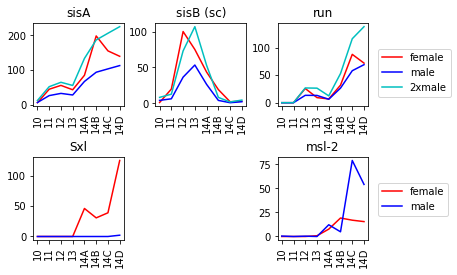

<Figure size 1080x720 with 0 Axes>

In [71]:
fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35, hspace=0.6)
plt.figure(figsize=(15, 10))
for i in range(5):
    if i == 4:
        row = 1
        col = 2
    else:
        row = i // 3
        col = i % 3
    
    axs[row][col].plot(x, df_female.iloc[i, :], 'r', label='female')
    axs[row][col].plot(x, df_male.iloc[i, :], 'b', label='male')
    if row == 0:
        axs[row][col].plot(x, df_2xmale.iloc[i, :], 'c', label='2xmale')
    if col == 2:
        axs[row][col].legend(bbox_to_anchor=(1.05, .75), loc='upper left')
    
    plt.setp(axs[row][col].xaxis.get_majorticklabels(), rotation=90)
    
    if i == 1:
        axs[row][col].set_title("sisB (sc)") 
    else:
        axs[row][col].set_title(df.index[i])

    

axs[1][1].axis('off')
plt.tight_layout()
plt.show()